In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os

In [6]:
base_path = r"C:\Users\ravit\project cycle\banana_classification"
train_path = os.path.join(base_path, "train")
val_path = os.path.join(base_path, "valid")


In [9]:
img_size = (150, 150)  # Image size of 150x150
batch_size = 32


In [11]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,   
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [13]:
val_datagen = ImageDataGenerator(rescale=1.0/255) 

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 11793 images belonging to 4 classes.


In [15]:
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 1123 images belonging to 4 classes.


In [33]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),  
    
    Dense(512, activation='relu'),
    Dropout(0.5), 
    Dense(4, activation='softmax')  
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])






In [35]:
epochs = 10
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=epochs)


Epoch 1/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 349s 939ms/step - accuracy: 0.4966 - loss: 1.1467 - val_accuracy: 0.8700 - val_loss: 0.3667
Epoch 2/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 338s 915ms/step - accuracy: 0.8272 - loss: 0.4445 - val_accuracy: 0.9154 - val_loss: 0.2691
Epoch 3/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 316s 857ms/step - accuracy: 0.8755 - loss: 0.3471 - val_accuracy: 0.8673 - val_loss: 0.4296
Epoch 4/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 352s 955ms/step - accuracy: 0.8862 - loss: 0.3141 - val_accuracy: 0.9234 - val_loss: 0.2309
Epoch 5/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 349s 945ms/step - accuracy: 0.9156 - loss: 0.2519 - val_accuracy: 0.9305 - val_loss: 0.2057
Epoch 6/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 1801s 5s/step - accuracy: 0.9187 - loss: 0.2520 - val_accuracy: 0.9118 - val_loss: 0.2357
Epoch 7/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 219s 593ms/step - accuracy: 0.9211 - loss: 0.2322 - val_accuracy: 0.8967 - val_loss: 0.2934
Epoch 8/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 218s 590ms/step - accuracy: 0.9220 - l

In [37]:
train_accuracy = history.history['accuracy'][-1] 
val_accuracy = history.history['val_accuracy'][-1]  
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Training Accuracy: 92.96%
Validation Accuracy: 93.94%


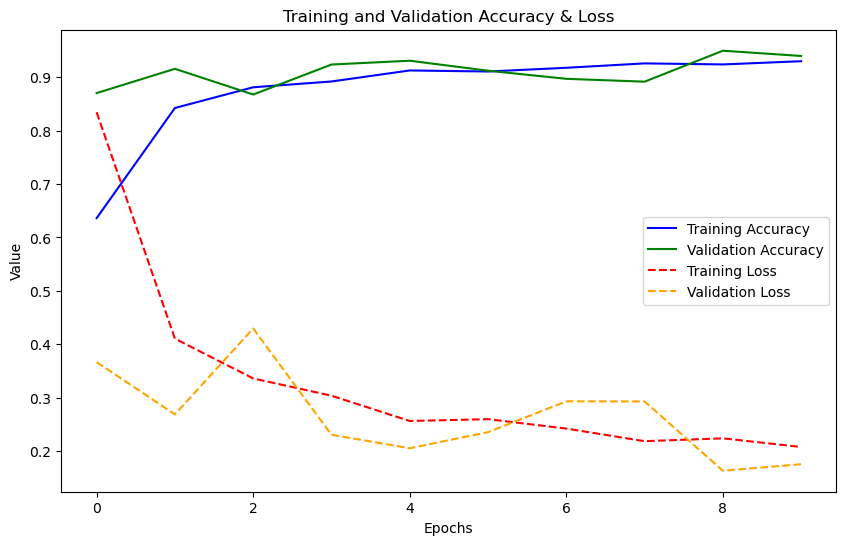

In [39]:
plt.figure(figsize=(10, 6))

plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')


plt.plot(history.history['loss'], label='Training Loss', color='red', linestyle='--')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='--')

plt.title('Training and Validation Accuracy & Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()

plt.show()



In [45]:

model.save("banana_quality_model_1.h5")


In [43]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,107,150 (217.85 MB)

 Trainable params: 19,035,716 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,071,434 (145.23 MB)